In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import math

import sys
sys.setrecursionlimit(5000)
import datetime

In [2]:
# gobs3 = open("Data/obs3.txt", "r")
gts = open("Data/ts.txt", "r")
# gagg3 = open("Data/agg3.txt", "r")
# obs3 = pd.read_csv(gobs3)
ts = pd.read_csv(gts)
# agg3 = pd.read_csv(gagg3)
print(ts)

# gobs3tt = open("Data/obs3_tuftit.txt", "r")
# gtstt = open("Data/ts_tuftit.txt", "r")
# gagg3tt = open("Data/agg3_tuftit.txt", "r")
# obs3tt = pd.read_csv(gobs3)
# tstt = pd.read_csv(gts)
# agg3tt = pd.read_csv(gagg3tt)

# def diff(row):
#     return datetime.date(int(row["YEAR"]),int(row["MONTH"]),int(row["DAY"])) - datetime.date(2017,1,1)

# ts["ds"] = ts.apply(diff,axis=1)
# ts = ts.drop(["DAY","MONTH","YEAR"],axis=1)
# print(agg3)

# agg3tt["ds"] = agg3tt.apply(diff,axis=1)
# agg3tt = agg3tt.drop(["DAY","MONTH","YEAR"],axis=1)
# print(agg3tt)

# agg3both = pd.concat([agg3,agg3tt])
# pd.set_option('display.max_columns', 6)
# print(agg3)
# print(agg3tt)
# print(agg3both)

# z = open("Data/aggthree.txt", "a")
# z.write(agg3.to_csv())
# z.close()

         LATITUDE  LONGITUDE    ds  AVGOBS
0              28        -97     0     0.0
1              28        -97     1    11.0
2              28        -97     2     0.0
3              28        -97     3     0.0
4              28        -97     4     6.0
...           ...        ...   ...     ...
1687615        49        -68  2552     0.0
1687616        49        -68  2553     0.0
1687617        49        -68  2554     0.0
1687618        49        -68  2555     0.0
1687619        49        -68  2556     0.0

[1687620 rows x 4 columns]


In [3]:
from statsmodels.tsa.api import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
data = ts[ts["LATITUDE"] == 36]
# data = agg3[agg3["LATITUDE"] == 36]
data = data[data["LONGITUDE"] == -86]
data = data[["ds","AVGOBS"]]

def newdate(row):
    return pd.to_datetime(datetime.timedelta(days = row["ds"])+datetime.date(2017,1,1))

data["dsreal"] = data.apply(newdate,axis=1)
data = data.drop(["ds"],axis=1)
data.index = data["dsreal"]
# data = data.drop(["dsreal"],axis=1)
# data = data.drop["ds"]

print(data)

# decompose_data = seasonal_decompose(data, model="additive")
# decompose_data.plot();

data_train = data.iloc[:-14].copy()
data_test = data.iloc[-14:].copy()
arima = SARIMAX(data_train.AVGOBS.values,
                   order=(5, 1, 5)).fit(maxiter=200)

               AVGOBS     dsreal
dsreal                          
2017-01-01   0.000000 2017-01-01
2017-01-02   1.666667 2017-01-02
2017-01-03   1.500000 2017-01-03
2017-01-04   5.000000 2017-01-04
2017-01-05   1.500000 2017-01-05
...               ...        ...
2023-12-28   5.666667 2023-12-28
2023-12-29  12.500000 2023-12-29
2023-12-30  11.000000 2023-12-30
2023-12-31  16.500000 2023-12-31
2024-01-01  13.333333 2024-01-01

[2557 rows x 2 columns]
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.78201D+00    |proj g|=  7.90957D-02

At iterate    5    f=  2.77792D+00    |proj g|=  5.38955D-02


 This problem is unconstrained.



At iterate   10    f=  2.77426D+00    |proj g|=  1.95441D-02

At iterate   15    f=  2.77337D+00    |proj g|=  5.27973D-03

At iterate   20    f=  2.77334D+00    |proj g|=  5.85195D-03

At iterate   25    f=  2.77310D+00    |proj g|=  8.59108D-03

At iterate   30    f=  2.77267D+00    |proj g|=  4.50199D-03

At iterate   35    f=  2.77264D+00    |proj g|=  1.07363D-03

At iterate   40    f=  2.77264D+00    |proj g|=  4.97451D-04

At iterate   45    f=  2.77264D+00    |proj g|=  5.62023D-04

At iterate   50    f=  2.77263D+00    |proj g|=  1.09742D-03

At iterate   55    f=  2.77262D+00    |proj g|=  4.39265D-03

At iterate   60    f=  2.77259D+00    |proj g|=  8.11823D-03

At iterate   65    f=  2.77255D+00    |proj g|=  5.68811D-03

At iterate   70    f=  2.77253D+00    |proj g|=  5.80981D-03

At iterate   75    f=  2.77252D+00    |proj g|=  1.30160D-03

At iterate   80    f=  2.77250D+00    |proj g|=  6.55798D-03

At iterate   85    f=  2.77247D+00    |proj g|=  4.09667D-03

At iter

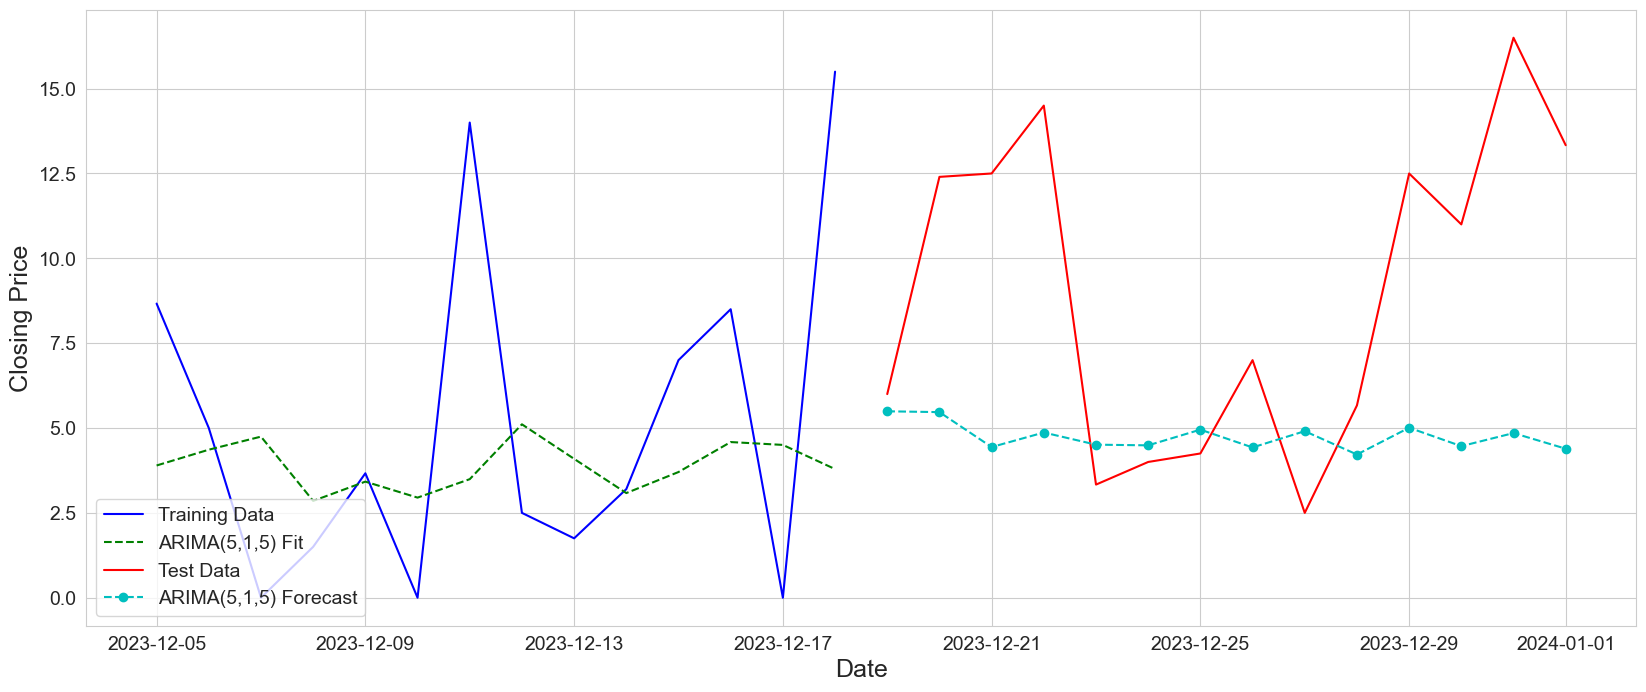

In [6]:
plt.figure(figsize=(20,8))


plt.plot(data_train.dsreal[-14:], 
         data_train.AVGOBS[-14:],
         'b',
         label="Training Data")


## We can get the fitted values with fittedvalues
plt.plot(data_train.dsreal[-14:], 
         arima.fittedvalues[-14:],
         'g--',
         label="ARIMA(5,1,5) Fit")

plt.plot(data_test.dsreal, 
         data_test.AVGOBS,
         'r',
         label="Test Data")

## We can get the forecast with .forecast(h)
plt.plot(data_test.dsreal, 
         arima.forecast(14),
         'c--o',
         label="ARIMA(5,1,5) Forecast")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()